**COMP3670 Assignment 5 - Matrix Decomposition & Dimensionality Reduction**
---

**Enter Your Student ID:u7207311

**Your Name:Mustafa Mohammadi 
    

**Submit:** You can write your answers in this file and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'. Otherwise, you can write your programming questions in this file, and submit two files, 'uXXXXXXX.ipynb' for programming and 'uXXXXXXX.pdf' for theory. Please submit them separately instead of a zip file.
    
**Enter Discussion Partner IDs Below:**
- <Enter ID 1>
- <Enter ID 2>
- <Enter ID 3>
    

**Programming Section**
- 1 = 10%
- 2 = 15%
- 3 = 30%
- 4 = 10%
- 5 = 20%
- 6 = 15%

---


**PROGRAMMING SECTION**
---

For all of the following, program the solution yourself. Don't just call a library function that does the whole question for you, or you'll get zero (no, that doesn't mean you can't use any library functions, but it does mean that you have to show you understand how to compute the answer yourself).

**All written answers** should be between 50 and 500 words. If you can describe all the necessary information in 50 words, that's better. However, you'll only be graded on whether you describe the necessary ideas.


-----------

   **TASK 0.1:** You know the drill. Import Numpy and PyPlot. We're also going to generate a dataset.


-----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #This is for 3d scatter plots.
import math
import random
from scipy.stats import multivariate_normal
import os
from matplotlib.pyplot import imread
np.random.seed(13579201)


(77760, 135)


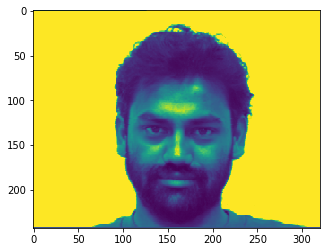

In [2]:
width = 320
height = 243
images = []
for file in os.listdir("./train"):
    if file.endswith(".pgm"):
        im = imread("./train/" + file)
        im = im.flatten('F') # flatten im into a vector
        images.append(im) 
A_pp = np.stack(images).T # build a matrix where each column is a flattened image
print(A_pp.shape)
plt.imshow(A_pp[:, 134].reshape(width, height).T)
plt.show()

PROGRAMMING EXERCISE 1  
-----------

---
   **TASK 1.1:** Complete the function $laplace\_expansion(A) = |A|$, where $A \in \mathbb{R}^{N \times N}$, and $|A|$ is the determinant of $A$.
   
**HINT:**
- One way to find the determinant is to implement the Laplace Expansion algorithm. This is described in the matrix decomposition lecture slides.
- $|A| \neq 0$ iff $A$ is invertible.
---


In [3]:
def det(A):
    # Assume input matrix A is always square
    n = np.shape(A)[0]
    
    if n == 1:
        return A[0]
    
    if n > 2:
        det_A = 0
        for i in range(n):
            New_A = np.delete(A, 0, 1) 
            Sub_Matrix = np.delete(New_A, i, 0)

            det_A += (-1)**i * A[i, 0] * det(Sub_Matrix)
        
    else:
        return (A[0][0]*A[1][1] - A[0][1]*A[1][0])

    return det_A

print(det(np.eye(2)))


1.0


---

**TASK 1.2:** Let $A\_{pp} \in \mathbb{R}^{D \times N}$ be a matrix of data. Each column of $A\_{pp}$ is a sample of data (1 training example for instance). The rows of $A\_{pp}$ are thus the features (dimensions) of each of these samples. Complete the function $preprocess(A\_{pp}) = A, Q\_norms, A\_means$, for which:

$$Q_{i,:} = A\_{pp}_{i,:} - \mu_i$$

...where $\mu_i = \frac{1}{m}\sum_j A\_{pp}_{ij}$ .

$$A_{i,:} = \frac{Q_{i,:}}{||Q_{i,:}||_\infty }$$


$A \in \mathbb{R}^{D \times N}$

$Q_{i,:}$ is the $i^{th}$ row of $Q$.

$A_{i,:}$ is the $i^{th}$ row of $A$.

$||Q_{i,:}||_\infty$ is the infinity norm of $Q_{i,:}$.

$Q\_norms \in \mathbb{R}^{D}$ is a vector recording $||Q_{i,:}||_\infty$ for every feature dimension $i$.

$A\_means \in \mathbb{R}^{D}$ is a vector recording $\mu_i$ for every feature dimension $i$.


**HINT:** 
- If the norm is 0, divide by 1 instead.

---

In [4]:
def preprocess(A_pp):
    # WRITE CODE HERE
    d, n = np.shape(A_pp)
    A = np.zeros((d,n))
    Q_norms = np.zeros(d)
    A_means = np.zeros(d)
    Q = np.zeros((d,n))
    
    for i in range(d):
        Current_Feature_Mean = np.mean(A_pp[i,:])

        Mean = np.array([Current_Feature_Mean for i in range(n)])

        Data_Subtract_Mean = A_pp[i,:] - Current_Feature_Mean
        Q[i,:] = Data_Subtract_Mean
        
        Infinity_Norm = np.max(np.abs(Data_Subtract_Mean))
        if Infinity_Norm == 0:
            Infinity_Norm = 1 

        Normalised_Data = Data_Subtract_Mean / Infinity_Norm
        A[i,:] = Normalised_Data
        
        Q_norms[i] = Infinity_Norm
        A_means[i] = Current_Feature_Mean

    return A, Q_norms, A_means

A, Q_norms, A_means = preprocess(A_pp)
print(A)
print(Q_norms)
print(A_means)

[[-0.05675839  0.08298111  0.08298111 ...  0.08298111  0.08298111
   0.08298111]
 [ 0.04695702  0.04695702  0.04695702 ...  0.04695702  0.04695702
   0.04695702]
 [ 0.02724746  0.03954982  0.03954982 ...  0.03954982  0.03954982
   0.03954982]
 ...
 [ 0.28539493  0.18479881  0.28539493 ...  0.24627422  0.28539493
   0.28539493]
 [ 0.29004113  0.17786364  0.29004113 ...  0.22273464  0.29004113
   0.29004113]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
[ 85.87407407 156.64444444 162.57037037 ... 178.93333333 178.28888889
   1.        ]
[122.87407407 247.64444444 248.57037037 ... 203.93333333 203.28888889
  68.        ]


---

$A \in \mathbb{R}^{D \times N}$ as above is a matrix of data where every column is a sample of data, and every row is a feature of that data. In this case, we're going to be working with images. Each column $A_{:,j}$ of $A$ is an image of a face. 

"But an image is a square grid" you might be thinking. Well, we've simply taken every column of the image and stacked them vertically, converting a $320$ column $ \times 243$ row pixel image into a $77760 \times 1$ dimensional vector.

Hence $D = 77760$ and we have $N = 135$ images.

According to our lecture, we should first compute the covariance matrix $AA^T$, and then calculate the eigenvalues and eigenvectors of this covariance matrix. However, in our case, $AA^T$ is a $77760 \times 77760$ dimensional matrix. 

Luckily, our lecture introduces an efficient method to work with such high-dimensional data. 

That is, we have the choice of either working with the covariance matrix with respect to the features (the pixels of an image), or with respect to the images as a whole.

By this I mean we could compute the covariance matrix by using $AA^T$ (which would give us the covariance between pixels), or by computing $A^T A$ (which would give us the covariance between images).

For this assignment, you should use $A^T A$.


---

Our objective is to describe each image of a face as a linear combination of other images. These other images are called Eigen Faces. The Eigen Faces, when flattenned into a column vector, is $77760\times 1$ dimensional. These vectors are the Eigenvectors of the matrix $AA^T$.

To compute the eigen faces $F$, we need to compute the eigenvalues and eigenvectors of matrix $A^T A $. From our lecture, you should be aware that the non-zero eigenvalues of $A A^T$ and $A^T A$ are identical. 

Moreover, if we let one of the eigenvectors of $A^T A $ be $v_m$, then the corresponding eigenvector of $AA^T$ is $f_m=A v_m$. 


So...

$$F = [f_1, f_2, ..., f_N]\in \mathbb{R}^{77760 \times 165}$$

To represent our 135 images as a linear combination of the 135 principle components (eigenfaces), we project our images onto the 165 principle components, and obtain

$$C = A^T F\in \mathbb{R}^{135 \times 135}$$.



---

**TASK 1.3:** Use $np.linalg.eig()$ and the functions you defined above to complete the function $eigen\_faces(A\_{pp}) = C, F, D, Q\_norms, A\_means$.

$D$ is the matrix of eigen values. 

$F$ is the eigen faces.

Make sure you preprocess the data.

**HINT:** 
- You'll need to ensure the columns of $F$ are unit vectors.
- np.cov()
- np.linalg.eig()
- If you've computed things correctly, all your eigen values should be real numbers (the imaginary components should be 0). Thus, you can ignore the error about imaginary / complex values.

---

In [5]:
def eigen_faces(A_pp):
    A, Q_norms, A_means = preprocess(A_pp)
    
    d, n = np.shape(A)
    F = np.zeros((d,n))
    
    Covariance_Matrix = np.dot(A.T, A)
    
    Eigenvalues, Eigenvectors = np.linalg.eig(Covariance_Matrix)
    
    Num_Eigenvals = len(Eigenvalues)
    
    for i in range(Num_Eigenvals):
        v_m = Eigenvectors[:,i]
        f_m = np.dot(A, v_m)
        F[:,i] = f_m / np.linalg.norm(f_m)
    
    D = np.zeros((Num_Eigenvals, Num_Eigenvals))
    for i in range(Num_Eigenvals):
        D[i,i] = Eigenvalues[i]
    
    C = np.dot(A.T, F)

    return C, F, D, Q_norms, A_means

#For the purposes of doing this assignment, this code isn't really here. Pretend it's engraved in rock.
C, F, D, Q_norms, A_means = eigen_faces(A_pp)
F_real = np.real(F)
print('Orthogonality Check (should be close to 0): ', F_real[:, 0].T@F_real[:, 1])
print('Unit Vector Check: ', math.isclose(np.linalg.norm(F_real[:,0]), 1))
print(F.shape)
print(C.shape)
print(D.shape)


/Users/parzival2108/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


Orthogonality Check (should be close to 0):  1.6653345369377348e-16
Unit Vector Check:  True
(77760, 135)
(135, 135)
(135, 135)


/Users/parzival2108/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: ComplexWarning: Casting complex values to real discards the imaginary part


---

So, now we have representations of the images as a linear combination of the columns of $F$. 

We can reconstruct an original flattenned image (we'll call this $R\_vector$), by computing $R\_vector = C_i F^T \odot Q\_norms + \mu$ , where $i$ is the index of the image coefficients in $C$ (in other words, row $i$ of $C$).

$\odot$ is the Hadamard product: https://en.wikipedia.org/wiki/Hadamard_product_(matrices)

Next we want to obtain $R$, the original image. 

$\Gamma$ above represents a function which takes a vector $R\_vector \in \mathbb{R}^{D}$, where $D = 77760$, and returns matrix $R \in \mathbb{R}^{243 \times 320}$, reversing the flatting process we undertook to create the dataset in the first code cell of this assignment. 

Recall the flattening process we used to create the dataset just stacked every column of an image on top of one another (as described earlier).

So our full image reconstruction $R = \Gamma \left[R\_vector \right]$

---

**TASK 1.4:** Decipher the above mathematics to complete the function $reconstruct\_image(Img, F, Q\_norms, A\_means) = R$, where $R \in \mathbb{R}^{243 \times 320}$.

$Img \in \mathbb{R}^{1 \times m}$ is the coefficients of an image.

---

309.359315180981 -28.58705086630816


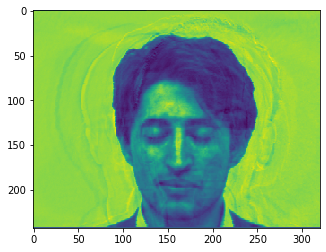

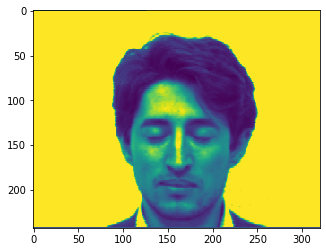

In [6]:
def reconstruct_image(Img, F, Q_norms, A_means):
    
    R_vector = np.multiply(np.dot(Img.copy(), F.T), Q_norms) + A_means
    im = np.reshape(R_vector, (320, 243)).T
    
    return im

#Display Code. Shoo! Away with you!
Idx = 133
Img = (A[:, Idx]).T@F
R = reconstruct_image(Img, F, Q_norms, A_means)
plt.imshow(R)
print(np.amax(R), np.amin(R))
plt.show()
R = A_pp[:, Idx].reshape(width, height).T
plt.imshow(R)
plt.show()
 

---

Recall the lecture, in which we rotated a vector until we found the largest value for the projection of the data onto that vector.

This was the eigen vector corresponding to the largest eigen value of that dataset. It was the "direction of greatest variance".

An eigen value $d_j$ in the $j^{th}$ column of $D$ (the matrix of eigen values), is associated with an eigen vector (or eigen face) in the $j^{th}$ column $f_j$ of $F$.

The variance of the data in the direction of $f_j$ is exactly $d_j$. So the $\sum_j d_j$ is the total variance of the dataset in all directions.

When we project the dataset onto an eigen face $f_k$, we "capture" a percentage of this variance $\frac{d_k}{\sum_j d_j}$. For example, if $\sum_j d_j = 100$, and we project our data on to the 2 eigen faces $f_1$ and $f_2$ with corresponding eigen values $d_1 = 19$ and $d_2 = 3$, then we've captured $\frac{22}{100} = 22\%$ of the variance of the dataset.

---

**TASK 1.5:** Complete the function: 

$$reduce\_dimensionality(image\_vector, k, F, D, A\_means, Q\_norms) = compressed\_image, p$$

This function projects an image vector onto the $k$ eigen faces corresponding to the $k$ largest eigen values, and returns the coefficients of the compressed image $compressed\_image$ and the number $p$, which is percentage of variance captured by the $k$ eigen faces.

**HINT:** 
- Remember to preprocess the image vector.
- In the original version of this question, you were expected to modify the input parameters. This is no longer required as I've included them below as needed. 
- $compressed\_image \in \mathbb{R}^{N}$. In the below example, $k=3$, so $compressed\_image$ should have $3$ non-zero elements, and $N-3$ elements which are 0.
- np.eig() automatically orders eigen values for you.
- As a general tip with arrays, remember, writing array = Img will turn array into Img. Instead, us array = Img.copy().

---


Variance Captured: 78 %
310.71118728067245 -31.24125033328336


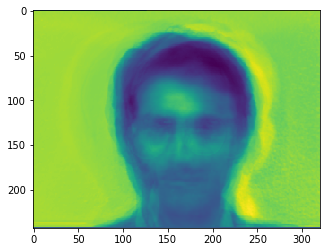

309.359315180981 -28.58705086630816


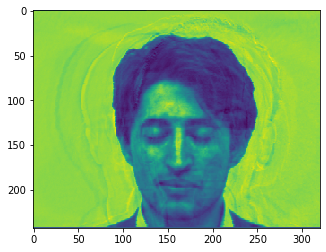

Error (expect around 2500000 for k = 10): 
 1648137.0398824234


In [7]:
def reduce_dimensionality(image_vector, k, F, D, A_means, Q_norms):
    Processed_Image = (image_vector - A_means) / Q_norms
    
    Kth_Eigenvectors = F[:,:k]
    
    compressed_image = np.zeros(np.shape(F)[1])
    
    Coefs = np.dot(Processed_Image, Kth_Eigenvectors)
    for i in range(k):
        compressed_image[i] = Coefs[i]
    
    p = np.sum(np.diag(D)[:k]) / np.sum(np.diag(D))
    
    return compressed_image, p

#Display Code. Leave it alooooooooooone.
#You can mess with settings, but return them to their original values.
compressed_image, p = reduce_dimensionality(A_pp[:, Idx], 10, F, D, A_means, Q_norms)
print('Variance Captured:', int(p * 100), '%')

R_c = reconstruct_image(compressed_image, F, Q_norms, A_means)
plt.imshow(R_c)
print(np.amax(R_c), np.amin(R_c))
plt.show()
R_o = reconstruct_image(Img, F, Q_norms, A_means)
plt.imshow(R_o)
print(np.amax(R_o), np.amin(R_o))
plt.show()
print('Error (expect around 2500000 for k = 10): \n', np.sum(np.abs(R_c - R_o)))

Now, lets using the tool to do a simple classification task.

**TASK 1.6:** Complete the function: 

$$the\_nearest\_image(image\_vector, k, F, D, A\_means, Q\_norms) = index\_of\_the\_nearest\_image$$

Using the function in task 1.5 to project an image vector onto the $k$ eigen faces corresponding to the $k$ largest eigen values. 
Use this projection for a nearest-neighbour search over all the 135 faces. Returns the index of the nearest image.

**HINT:** 
- First you need to calculate all compressed image, then make search
- Using Euclidean distance to calculate the distance between two vectors.

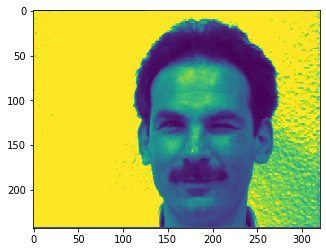

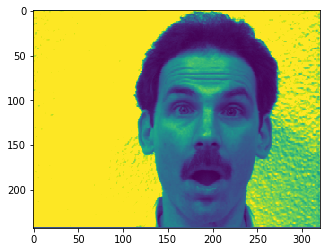

In [8]:
def the_nearest_image(image_vector, A_pp, k, F, D, A_means, Q_norms):
    Compressed_Target = reduce_dimensionality(image_vector, k, F, D, A_means, Q_norms)[0]

    index = 0
    Compressed_Img = reduce_dimensionality(A_pp[:,0], k, F, D, A_means, Q_norms)[0]
    Closest_Distance = np.sqrt(sum((Compressed_Target - Compressed_Img) ** 2))

    d, n = np.shape(A_pp)
    
    for i in range(1, n):
        Compressed_Img = reduce_dimensionality(A_pp[:,i], k, F, D, A_means, Q_norms)[0]
        Distance = np.sqrt(sum((Compressed_Target - Compressed_Img) ** 2))
        if Distance < Closest_Distance:
            Closest_Distance = Distance
            index = i
    
    return index
    
im2 = imread("./test/subject02.wink.pgm")
im2 = im2.T.flatten()
idx = the_nearest_image(im2, A_pp, 10, F, D, A_means, Q_norms)

plt.imshow(im2.reshape(width, height).T)
plt.show()
plt.imshow(A_pp[:, idx].reshape(width, height).T)
plt.show()